In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

np.random.seed(0)

In [2]:
def read_image(path='superman-batman.png'):
    return cv2.imread(path)[:,:,::-1].reshape(-1, 3)

In [5]:
def k_means(X, n_clusters=n_clusters, distance_metric=dist):
    
    # initializing mu with k-means++
    tmp = np.ascontiguousarray(X).view(np.dtype((np.void, X.dtype.itemsize * X.shape[1])))
    _, idx, inv_idx = np.unique(tmp, return_index=True, return_inverse=True)
    unique_samples = X[idx]

    mu_ind = np.zeros(n_clusters, dtype=np.int64)
    mu_ind[0] = np.random.randint(unique_samples.shape[0])

    for k in range(1, n_clusters):
        # finding square of distance to nearest cluster for each unique sample 
        distances = np.array([min([np.square(dist(cluster, sample))]
                                  for cluster in unique_samples[mu_ind[:k]]) for sample in unique_samples])
        probabilities = distances / np.sum(distances)
        mu_ind[k] = np.random.choice(unique_samples.shape[0], 1, p=probabilities.ravel())
    
    mu = (unique_samples[mu_ind]).astype(np.int64)
    mu_prev = np.zeros_like(mu)
    
    c_unique = np.zeros(unique_samples.shape[0], dtype=np.int64)
    
    while (mu != mu_prev).any():
        mu_prev = mu.copy()
        mu = np.zeros_like(mu)
        mu_num = np.zeros_like(mu_ind, dtype=np.int64)

        for i, sample in enumerate(unique_samples):
            c_unique[i] = np.argmin(np.array([dist(cluster, sample) for cluster in mu_prev]))
            mu_num[c_unique[i]] += 1
            mu[c_unique[i]] += sample

        mu = (mu / mu_num.reshape(n_clusters, -1)).astype(np.int64)
        
    return (c_unique[inv_idx], mu)

In [13]:
def centroid_histogram(labels):
    res = np.histogram(labels, bins=labels.max()+1)[0]
    return res / np.sum(res)

In [7]:
def plot_colors(hist, centroids):
    
    height, width = (50, 200)
    
    bar = np.zeros((height, width, 3), dtype='uint8')
    start_x = 0
    
    for percent, color in zip(hist, centroids):
        end_x = start_x + width * percent
        cv2.rectangle(bar, (int(start_x), 0), (int(end_x), height), color.astype('uint8').tolist(), -1)
        start_x = end_x
    
    return bar

In [14]:
def recolor(image, n_colors=n_clusters):
    
    c, mu = k_means(image.astype(np.int64), n_clusters=n_colors)
    
    plt.figure()
    plt.imshow(plot_colors(centroid_histogram(c), mu))
    plt.show()
    
    cv2.imwrite('superman-batman-16-colors.png', mu[c].reshape(1024, 768, 3)[:,:,::-1])

In [3]:
n_clusters = 16

In [4]:
dist = lambda a, b: np.linalg.norm(a.astype(np.float64)-b)

In [8]:
img = read_image()

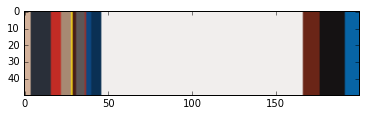

In [15]:
recolor(img)